Unsupervised learning

# 1 k-means clustering
There is absolutely no guarantee of recovering a groynd truth. Firstly, choosing a right number of clusters is difficult. Secondly, the algorithm is sensitive to initialization, and can fall into local minima

In [1]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris, y_iris)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [2]:
print(k_means.labels_[::10])

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]


In [3]:
print(y_iris[::10])

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


## Application
Clustering can be seen as a way of choosing a small number of the examples to compress the information.

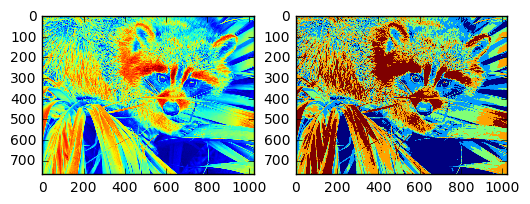

In [12]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face = misc.face(gray=True)
X = face.reshape((-1, 1))
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape
plt.subplot(121)
plt.imshow(face)
plt.subplot(122)
plt.imshow(face_compressed)
plt.show()

# 2 Hierarchical agglomerative clustering
Aims to build a hierarchy of clusters. In general, There two typical methods in hierarchical clustering. One is Agglomerative which clusters from bottom to up and another does from top to down.

In [21]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.image import grid_to_graph
import matplotlib.pyplot as plt
digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)
agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)
agglo.fit(X)
X_reduced = agglo.transform(X)
x_approx = agglo.inverse_transform(X_reduced)
image_approx = np.reshape(x_approx, images.shape)

# 3 Principal Component Analysis(PCA)
select the successive components that explain tehe maximum variance in signal

In [23]:
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2
X = np.c_[x1, x2, x3]
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
print(pca.explained_variance_)

[  2.63216442e+00   1.12539804e+00   8.39081032e-32]


In [25]:
pca.n_components=2
X_reduce = pca.fit_transform(X)
X_reduce.shape

(100, 2)

# 4 Independent Component Analysis(ICA)
Select components so that the distribution of their loading carries a maximum amount of idependent infomation.

In [28]:
time = np.linspace(0, 10, 2000)
s1 = np.sin(2*time)
s2 = np.sign(np.sin(3*time))
S = np.c_[s1, s2]
S += 0.2*np.random.normal(size=S.shape)
S /= S.std(axis=0)
A = np.array([[1,1],[0.5, 2]])
X = np.dot(S, A.T)
ica = decomposition.FastICA()
S_ = ica.fit_transform(X)
A_ = ica.mixing_.T
np.allclose(X, np.dot(S_,A_)+ica.mean_)

True